In [1]:
!pip install tensorflow_quantum


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 33.8 MB/s 
  Using cached cirq_core-0.13.1-py3-none-any.whl (1.6 MB)
  Using cached cirq_google-0.15.0-py3-none-any.whl (641 kB)
  Using cached cirq_google-0.14.1-py3-none-any.whl (541 kB)
  Using cached cirq_google-0.14.0-py3-none-any.whl (541 kB)
  Using cached cirq_google-0.13.1-py3-none-any.whl (437 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: cirq-core
    Found existing installation: cirq-core 1.0.0
    Uninstalling cirq-core-1.0.0:
      Successfully uninstalled cirq-core-1.0.0
  Attempting uninstall: cirq-google
    Found existing installation: cirq-google 1.0.0
    Uninstalling cirq-google-1.0.0:
      Successfully uninstalled cirq-google-1.0.0
ERROR: pip's dependency resolver does not curr

In [2]:
pip install cirq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cirq_core-1.0.0-py3-none-any.whl (1.8 MB)
  Using cached cirq_google-1.0.0-py3-none-any.whl (576 kB)
  Using cached protobuf-3.20.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: cirq-core
    Found existing installation: cirq-core 0.13.1
    Uninstalling cirq-core-0.13.1:
      Successfully uninstalled cirq-core-0.13.1
  Attempting uninstall: cirq-google
    Found existing installation: cirq-google 0.13.1
    Uninstalling cirq-google-0.13.1:
      Successfully uninstalled cirq-google-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 

Main Libraries

In [3]:

import numpy as np
import matplotlib.pyplot as plt
# QML
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit


In [4]:
# Import dataset from keras
from tensorflow.keras.datasets import fashion_mnist as dataset
(X_train,y_train),(X_test,y_test) = dataset.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# Prepare The Dataset
def filter_data(x,y):
  # filter data using labels
  keep = (y==5)|(y==9)
  x,y = x[keep],y[keep]
  y = y==5
  return x,y

In [7]:
# Filter train & test data
X_train,y_train = filter_data(X_train,y_train)
X_test,y_test = filter_data(X_test,y_test)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12000, 28, 28)
(12000,)
(2000, 28, 28)
(2000,)


Visualization

FIRST IMG HAS LABELFalse


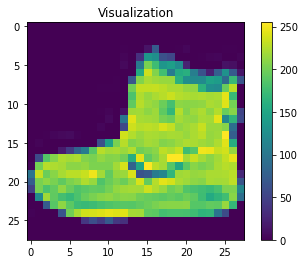

In [9]:
# PLOTING
print("FIRST IMG HAS LABEL{}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar(orientation="vertical")
plt.title("Visualization")
plt.show()


In [10]:
# Normalizing Train & Test in Image data
X_train = X_train/255.0
X_test = X_test/255.0

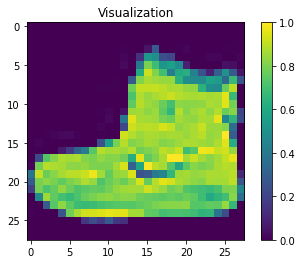

In [11]:
plt.imshow(X_train[0])
plt.colorbar(orientation="vertical")
plt.title("Visualization")
plt.show()

In [12]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [13]:
# Reshape the dataset
X_train = tf.image.resize(X_train,(2,2)).numpy()
X_test = tf.image.resize(X_test,(2,2)).numpy()

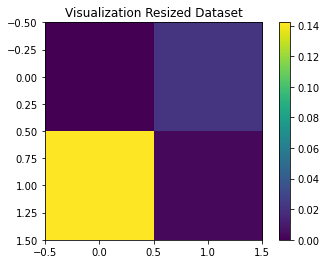

In [14]:
plt.imshow(X_train[1,:,:,0])
plt.colorbar(orientation="vertical")
plt.title("Visualization Resized Dataset")
plt.show()

MODEL BULIDING


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.15,random_state=0)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(10200, 2, 2, 1)
(10200,)
(1800, 2, 2, 1)
(1800,)


DATA ENCODING

In [17]:
# 1) PROCESS PIX VALUE TO BINARY CODE
X_train = X_train.reshape(X_train.shape[0],*(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0],*(1,4,1))
X_test = X_test.reshape(X_test.shape[0],*(1,4,1))




In [18]:
print(X_train[0])

[[[0.        ]
  [0.41568628]
  [0.7137255 ]
  [0.73921573]]]


In [19]:
def binary_encode(X,threshold=0.5):
  encoded_images = list()
  for image in X:
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)

In [20]:
X_train = binary_encode(X_train)
print(X_train[0])

[0 0 1 1]


In [21]:
X_train.shape

(10200, 4)

Creat Circuit from Image

In [22]:
def create_circuit_from_image(encoded_image):
  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

In [23]:
X_train = [create_circuit_from_image(encoded_image)for encoded_image in X_train]
print(X_train[0])

(1, 0): ───X───

(1, 1): ───X───


In [24]:
# 2) CONVERT CIRQ CIRCUIT INTO TENSORFLOW TF

In [25]:
X_train_tfq = tfq.convert_to_tensor(X_train)
X_train_tfq[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\x0e\n\x0ctfq_gate_set\x12\x99\x02\x08\x01\x12\x94\x02\n\x87\x01\n\x04\n\x02XP\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x12\x16\n\x0econtrol_qubits\x12\x04\n\x02\x1a\x00\x12\x16\n\x0econtrol_values\x12\x04\n\x02\x1a\x00\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x1a\x05\x12\x031_0\n\x87\x01\n\x04\n\x02XP\x12\x16\n\x0econtrol_qubits\x12\x04\n\x02\x1a\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x12\x16\n\x0econtrol_values\x12\x04\n\x02\x1a\x00\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x1a\x05\x12\x031_1'>

In [26]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [27]:
X_valid = [create_circuit_from_image(encoded_image)for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image)for encoded_image in X_test]

In [28]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

## **QUANTUM** **NEURAL** **NETWORK**


In [29]:
class QNN():
  def __init__(self,data_qubits,readout):
    self.data_qubits = data_qubits
    self.readout = readout

  def add_singleQubit_gate(self,circuit,gate,qubit_index):
    for index in qubit_index:
      circuit.append(gate(self.data_qubits[index]))
  
  def add_twoQubit_gate(self,circuit,gate,qubit_index):
    
    if len(qubit_index) !=2:
      raise Exception("The Length of list passed for two qubits\ gate operation must equal to two")
      circuit.append(gate(self.data_qubits[qubits_index[0]],self.data_qubits[quite_index[1]]))
  def add_layer(self,circuit,gate,symbol_gate):
    for i,qubit in enumerate(self.data_qubits):
      symbol = sympy.Symbol(symbol_gate+ '-'+str(i))
      circuit.append(gate(qubit,self.readout)**symbol)



In [30]:
def create_qnn():
  data_qubits = cirq.GridQubit.rect(2,2)
  readout = cirq.GridQubit(-1,-1)
  circuit = cirq.Circuit()

  circuit.append(cirq.X(readout))
  circuit.append(cirq.H(readout))

  qnn = QNN(data_qubits=data_qubits,readout=readout)

  # ADD THE ISING COUPLING XX GATE
  qnn.add_layer(circuit,cirq.XX,'xx')
  qnn.add_layer(circuit,cirq.ZZ,'zz')

  circuit.append(cirq.H(readout))
  return circuit,cirq.Z(readout)

In [31]:
qmodel ,model_readout = create_qnn()


 QUANTUM CIRCUIT

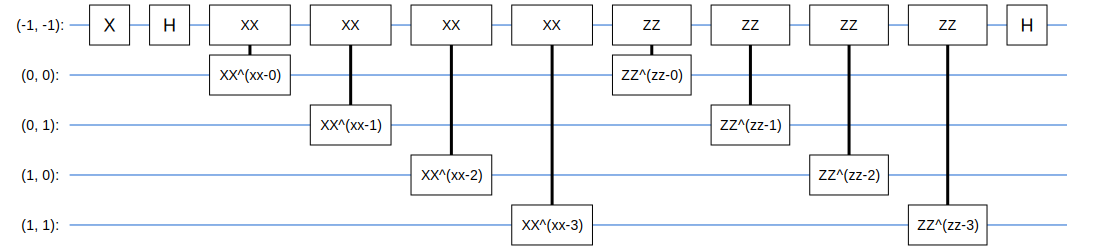

In [32]:
# LETS HAVE LOOK  OF QUANTUM CIRCUIT
SVGCircuit(qmodel)

In [33]:
model = tf.keras.Sequential([
    # encode tf as str
    tf.keras.layers.Input(shape=(),dtype=tf.string),
    # PQC (PARAMATRIZED QUANTUM CIRCUIT)
      tfq.layers.PQC(qmodel,model_readout),
])


In [34]:
# To use Hinge loss we convert the lables 1 & -1
y_train_h = np.array([1 if i==1 else -1 for i in y_train])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid])
y_test_h = np.array([1 if i==1 else -1 for i in y_test])

In [35]:
print(y_train_h[1])
print(y_valid_h[0])
print(y_test_h[1])

-1
1
1


In [36]:
# Def custom Hinge Accuracy
def hinge_accuracy(y_true,y_pred):
  y_true = tf.squeeze(y_true) > 0.0
  y_pred = tf.squeeze(y_pred) > 0.0
  result = tf.cast(y_true == y_pred,tf.float32)
  return tf.reduce_mean(result)

In [37]:
# Train QNN
model.compile(
    loss = tf.keras.losses.Hinge(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [hinge_accuracy])

In [38]:
qnn_history = model.fit(
    X_train_tfq,y_train_h,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data = (X_valid_tfq,y_valid_h)
)

Epoch 1/10
160/160 [==============================] - 16s 97ms/step - loss: 1.0437 - hinge_accuracy: 0.3308 - val_loss: 1.0034 - val_hinge_accuracy: 0.3820
Epoch 2/10
160/160 [==============================] - 10s 61ms/step - loss: 0.9920 - hinge_accuracy: 0.5739 - val_loss: 0.9615 - val_hinge_accuracy: 0.6180
Epoch 3/10
160/160 [==============================] - 5s 32ms/step - loss: 0.7453 - hinge_accuracy: 0.7427 - val_loss: 0.5034 - val_hinge_accuracy: 0.8626
Epoch 4/10
160/160 [==============================] - 5s 33ms/step - loss: 0.4380 - hinge_accuracy: 0.8311 - val_loss: 0.3921 - val_hinge_accuracy: 0.8351
Epoch 5/10
160/160 [==============================] - 5s 33ms/step - loss: 0.3974 - hinge_accuracy: 0.8344 - val_loss: 0.3917 - val_hinge_accuracy: 0.8351
Epoch 6/10
160/160 [==============================] - 5s 32ms/step - loss: 0.3940 - hinge_accuracy: 0.8253 - val_loss: 0.3942 - val_hinge_accuracy: 0.7958
Epoch 7/10
160/160 [==============================] - 5s 32ms/step -

In [39]:
model.evaluate(X_test_tfq,y_test_h)

63/63 [==============================] - 1s 10ms/step - loss: 0.3701 - hinge_accuracy: 0.8229


[0.370137095451355, 0.8229166865348816]

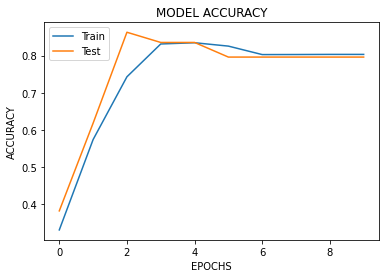

In [40]:
# VISUALING 
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title("MODEL ACCURACY")
plt.xlabel('EPOCHS')
plt.ylabel("ACCURACY")
plt.legend(['Train','Test'],loc='best')
plt.show()

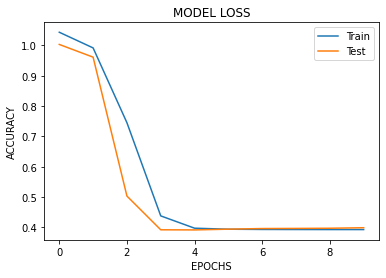

In [41]:
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title("MODEL LOSS")
plt.xlabel('EPOCHS')
plt.ylabel("ACCURACY")
plt.legend(['Train','Test'],loc='best')
plt.show()